Enter path to the initial age distribution file (default: InitialAge.csv):  
Enter path to the death rules file (default: DeathRules.csv):  
Enter path to the config file (default: config.json):  
Enter the start year of the simulation (default: 1970):  
Enter the end year of the simulation (default: 2021):  
Enter path to the output CSV file (default: results.csv):  
Enter the initial total population (in millions, default: 130):  


Simulation completed. Results saved to results.csv


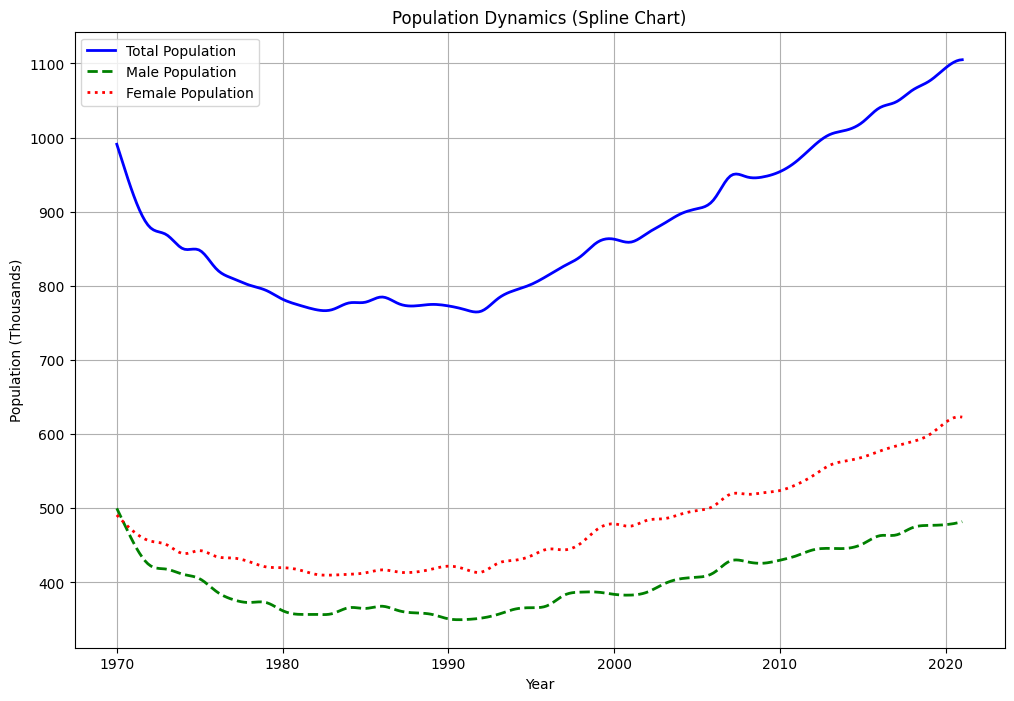

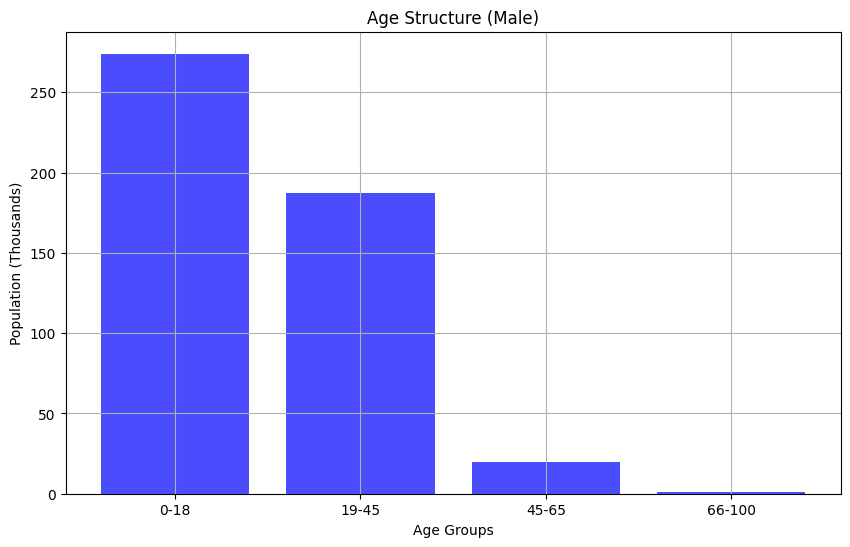

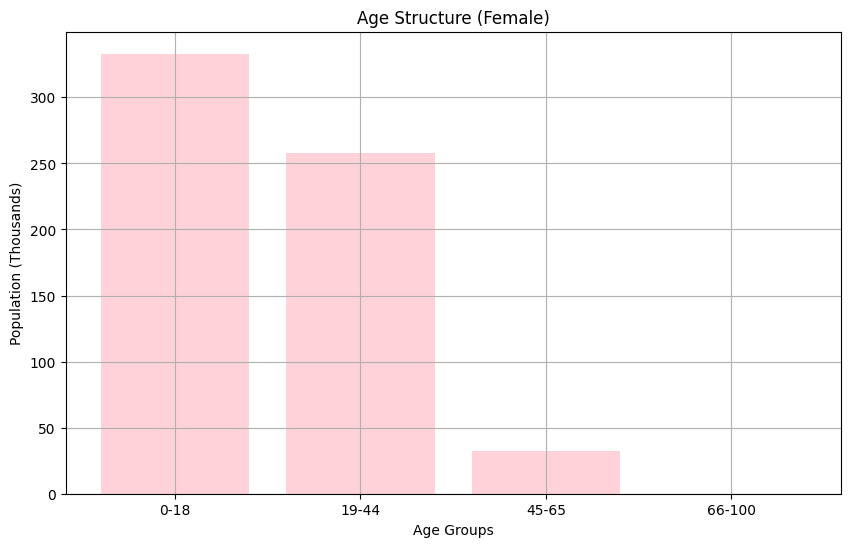

In [15]:
import subprocess
import pandas as pd
import matplotlib.pyplot as plt
from scipy.interpolate import make_interp_spline
import numpy as np


EXEC_PATH = '/Users/ana/projects/edu/APLLabs/lab6/Demographic.Exec/bin/Debug/net8.0/Demographic.Exec'
DEFAULT_INITIAL_AGE_PATH = 'InitialAge.csv'
DEFAULT_DEATH_RULES_PATH = 'DeathRules.csv'
DEFAULT_CONFIG_PATH = 'config.json'
DEFAULT_START_YEAR = 1970
DEFAULT_END_YEAR = 2021
DEFAULT_OUTPUT_PATH = 'results.csv'
DEFAULT_INIT_POPULATION_MLNS = 130


def run_simulation(initial_age_file, death_rules_file, config_file, start_year, end_year, output_file):
    """Runs the simulation via a console application."""
    subprocess.run([
        EXEC_PATH,
        initial_age_file,
        death_rules_file,
        config_file,
        str(start_year),
        str(end_year),
        output_file
    ])
    

def plot_spline_chart(x, y, label, color, linestyle='-', linewidth=2):
    """Plots a smoothed spline chart."""
    x_smooth = np.linspace(min(x), max(x), 300)  # Generate more points for smoothness
    spline = make_interp_spline(x, y, k=3)  # Cubic spline interpolation
    y_smooth = spline(x_smooth)
    plt.plot(x_smooth, y_smooth, label=label, color=color, linestyle=linestyle, linewidth=linewidth)
    

def visualize_population_dynamics(output_file):
    """Visualizes the population dynamics with spline charts."""
    data = pd.read_csv(output_file)

    plt.figure(figsize=(12, 8))

    # Total population
    plot_spline_chart(data['Year'], data['Total'], label='Total Population', color='blue')

    # Male population (sum of all male categories)
    male_population = data['Male_0_18'] + data['Male_19_45'] + data['Male_46_65'] + data['Male_66_100']
    plot_spline_chart(data['Year'], male_population, label='Male Population', color='green', linestyle='--')

    # Female population (sum of all female categories)
    female_population = data['Female_0_18'] + data['Female_19_45'] + data['Female_46_65'] + data['Female_66_100']
    plot_spline_chart(data['Year'], female_population, label='Female Population', color='red', linestyle=':')

    # Chart settings
    plt.xlabel('Year')
    plt.ylabel('Population (Thousands)')
    plt.title('Population Dynamics (Spline Chart)')
    plt.legend()
    plt.grid()
    plt.show()
    

def visualize_age_groups(output_file):
    """Visualizes the age group distribution for the last year."""
    data = pd.read_csv(output_file)
    last_year = data.iloc[-1]  # Get data for the last year

    # Age group data for males
    male_distribution = [
        last_year['Male_0_18'],
        last_year['Male_19_45'],
        last_year['Male_46_65'],
        last_year['Male_66_100']
    ]
    # Age group data for females
    female_distribution = [
        last_year['Female_0_18'],
        last_year['Female_19_45'],
        last_year['Female_46_65'],
        last_year['Female_66_100']
    ]

    # Categories
    male_categories = ['0-18', '19-45', '45-65', '66-100']
    female_categories = ['0-18', '19-44', '45-65', '66-100']

    # Male age group bar chart
    plt.figure(figsize=(10, 6))
    plt.bar(male_categories, male_distribution, alpha=0.7, label='Male', color='blue')
    plt.xlabel('Age Groups')
    plt.ylabel('Population (Thousands)')
    plt.title('Age Structure (Male)')
    plt.grid()
    plt.show()

    # Female age group bar chart
    plt.figure(figsize=(10, 6))
    plt.bar(female_categories, female_distribution, alpha=0.7, label='Female', color='pink')
    plt.xlabel('Age Groups')
    plt.ylabel('Population (Thousands)')
    plt.title('Age Structure (Female)')
    plt.grid()
    plt.show()
    

def main():
    initial_age_file = input(f"Enter path to the initial age distribution file (default: {DEFAULT_INITIAL_AGE_PATH}): ").strip()
    if not initial_age_file:
        initial_age_file = DEFAULT_INITIAL_AGE_PATH

    death_rules_file = input(f"Enter path to the death rules file (default: {DEFAULT_DEATH_RULES_PATH}): ").strip()
    if not death_rules_file:
        death_rules_file = DEFAULT_DEATH_RULES_PATH

    config_file = input(f"Enter path to the config file (default: {DEFAULT_CONFIG_PATH}): ").strip()
    if not config_file:
        config_file = DEFAULT_CONFIG_PATH

    start_year_input = input(f"Enter the start year of the simulation (default: {DEFAULT_START_YEAR}): ").strip()
    start_year = int(start_year_input) if start_year_input else DEFAULT_START_YEAR

    end_year_input = input(f"Enter the end year of the simulation (default: {DEFAULT_END_YEAR}): ").strip()
    end_year = int(end_year_input) if end_year_input else DEFAULT_END_YEAR

    output_file = input(f"Enter path to the output CSV file (default: {DEFAULT_OUTPUT_PATH}): ").strip()
    if not output_file:
        output_file = DEFAULT_OUTPUT_PATH

    initial_population_input = input(f"Enter the initial total population (in millions, default: {DEFAULT_INIT_POPULATION_MLNS}): ").strip()
    initial_population = int(initial_population_input) if initial_population_input else DEFAULT_INIT_POPULATION_MLNS

    run_simulation(
        initial_age_file=initial_age_file,
        death_rules_file=death_rules_file,
        config_file=config_file,
        start_year=start_year,
        end_year=end_year,
        output_file=output_file
    )

    visualize_population_dynamics(output_file)
    visualize_age_groups(output_file)

    
if __name__ == "__main__":
    main()
